Chuẩn bị các thư viện cần dùng (Prepare for using libraries):


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from LinearModel import *

# Linear Model From Scratch:
## Mở đầu (Preface):
Notebook này tôi xin trình bày về các kiến thức đã học được về các mô hình tuyến tính phổ biến hiện nay, đó là Liner Regression,  Polynomial Regression, Logistic Regression và Softmax Regression, cũng như cách chuẩn hóa mô hình tuyến tính và trình bày giải thuật tối ưu hóa đang được sử dụng rộng rãi là Gradient Descent (Xuống dốc). Phần notebook này không trình bày các kiến thức về SVMs, mặc dù SVM được coi là một mô hình tuyến tính, tuy nhiên tôi sẽ tìm hiểu riêng trong một notebook khác.

(*The contents covering in this notebook include my knowledges about some popular linear models such as Linear Regression, Polynomial Regression, Logistic Regression, and Softmax Regression. This notebook also includes the contents about the Gradient Descent - A optimizing algorithm that be used various nowadays. Note that the SVMs are not presented in this notebook and will be cover in a future notebook*)


## 1 Mô hình Linear Regression (Linear Regression):

### 1.1 Khởi tạo training set (Initialize the training set):

`X` có dạng `(x0, x1)`, ở đây ta lấy `x0 = 0`

`y` có dạng phương trình: $$y = x_0p_0 + x_1p_1$$, với `p0`, `p1` là hệ số của phương trình, `noise` biểu thị độ nhiễu (độ tản mát) của tập dữ liệu

In [2]:
X = 2 * np.random.rand(100, 1)
X_new = np.c_[np.ones((100, 1)), X]
y = X_new.dot(np.array([[4],[3]])) + np.random.randn(100, 1)

X.shape

(100, 1)

Vẽ lược đồ biểu diễn dữ liệu (Draw a figure that represents the data)

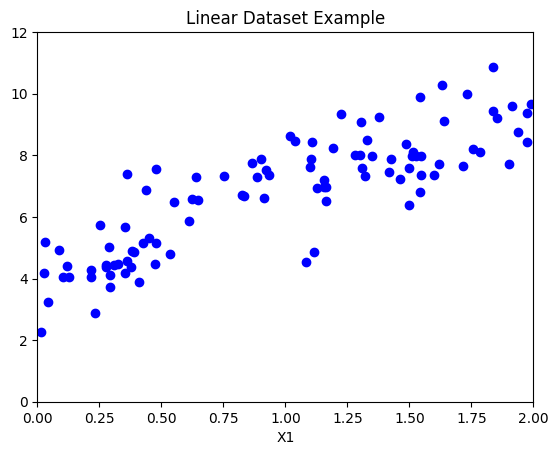

In [3]:
plt.plot(X, y, "ob")
plt.title("Linear Dataset Example")
plt.axis((0, 2, 0, 12))
plt.xlabel("X1")
plt.show()

### 1.2 Huấn luyện mô hình Linear Regression tự chế, sử dụng giải thuật Gradient Descent

#### 1.2.1 Mô hình Linear Regression
Ở đây tôi sử dụng mô hình Linear Regression dạng cơ bản, có công thức là: $$\hat{y} = \theta^T \cdot \bold{x}$$, trong đó:
* $\hat{y}$ là kết quả dự đoán
* $\bold{\theta} = (\theta_0, \theta_1, ... \theta_{n-1})$ là tham số mô hình. Có tất cả n tham số.
* $\bold{x} = (x_0, x_1, x_2, ...x_{m-1})$ là một đối tượng huấn luyện. Mỗi đối tượng huấn luyện có m thuộc tính, trong đó thuộc tính $x_0 = 1$.

Hàm mất mát sử dụng để huấn luyện mô hình là Mean Square Error - MSE:
$$ \text{MSE}(\bold{\theta}) = \frac{1}{m}\sum^m_{i = 1}{(\bold{\theta}^T\cdot\bold{x}_i - \hat{y}_i)^2}$$

#### 1.2.2 Huấn luyện mô hình:

Sử dụng mô hình tự cài đặt để huấn luyện mô hình theo giải thuật Batch Gradient Descent

In [4]:
model = MyLinearRegression(eta = 0.1, tol= 1e-7, save_loss_log=True)
model.fit_with_BGD(X, y)
model.coef

array([[4.11286684],
       [2.73972015]])

**Nhận xét**: Sau 162 Epoch thì mô hình tìm được kết quả với hai tham số $\theta_0 = 4.113$ và $\theta_1 = 2.74$, hai kết quả này tương đối sát với tham số thực tế (4,3). 1 Epoch là một lần mô hình duyệt qua toàn bộ tập huấn luyện. 

Dự đoán một giá trị X bất kỳ:

Chọn $X_{test} = 10$, ta tính được kết quả mong muốn khoảng $34$

In [5]:
X_test = np.array([[10]])
model.predict(X_test)

array([[31.5100683]])

Lập đồ thị trực quan đường thằng mô hình:

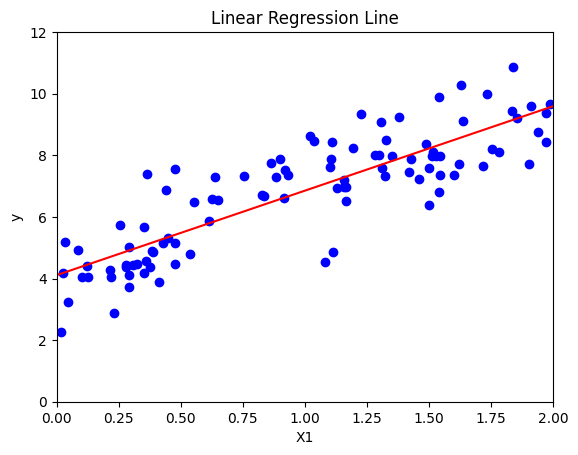

In [6]:
X_pred = np.linspace(0, 2, num=3000)
y_pred = model.predict(X_pred)

plt.plot(X, y, "ob")
plt.plot(X_pred, y_pred.T, "r-")
plt.title("Linear Regression Line")
plt.axis((0, 2, 0, 12))
plt.xlabel("X1")
plt.ylabel("y")
plt.show()

Biểu diễn hàm mất mát thay đổi theo epoch:

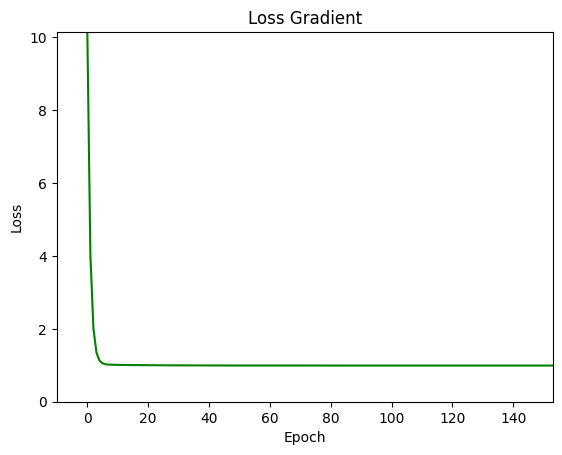

In [9]:
log_loss = model.loss_log
Epochs = [x[0] for x in log_loss]
Loss = [x[1] for x in log_loss]
plt.plot(Epochs, Loss, "g-")
plt.title("Loss")
plt.axis((-10, max(Epochs), 0, max(Loss)))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Gradient")
plt.show()

**Nhận xét**: Từ đồ thị, nếu tiếp tục huấn luyện có thể đạt được độ chính xác cao hơn

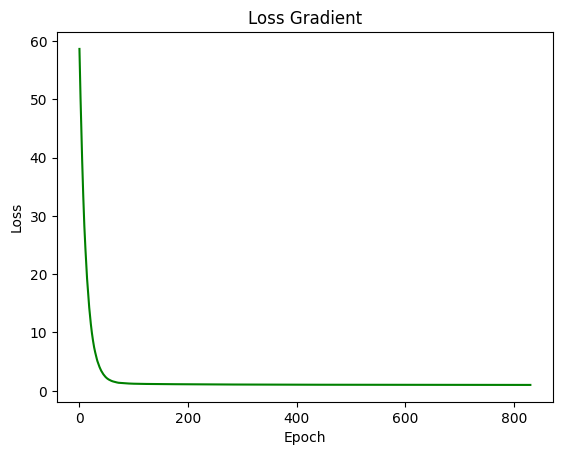

In [19]:
model = MySGDRegression(t0= 5, t1= 50000, max_iters=1000, tol= 1e-10, save_loss_log=True)
model.fit(X, y)
model.coef

log_loss = model.loss_log
Epochs = [x[0] for x in log_loss]
Loss = [x[1] for x in log_loss]
plt.plot(Epochs, Loss, "g-")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Gradient")
plt.show()

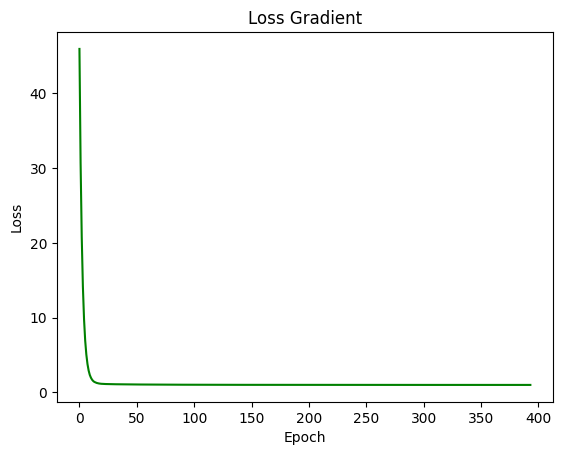

In [16]:
model = MyMiniBatchRegression(t0= 5, t1= 10000, max_iters=1000, tol= 1e-10, save_loss_log=True)
model.fit(X, y)
model.coef

log_loss = model.loss_log
Epochs = [x[0] for x in log_loss]
Loss = [x[1] for x in log_loss]
plt.plot(Epochs, Loss, "g-")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Gradient")
plt.show()